#Project Title: Movie Dataset Analysis
###Project Goals:
1. Clean and preprocess the data.
2. Analyze trends and insights such as top-rated movies, popular genres, and successful directors.
3. Visualize the results for better understanding.

### Title: Setup Environment

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "movies.csv"
df = pd.read_csv(url)

# Return the first 5 rows.
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Title: Understand the Data
1. Use .info() to check column types and null values.
2. Use .describe() for numeric statistics
3. Print unique values for categorical columns.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [23]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [24]:
df_columns = df.columns
df_columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [25]:
unique_genres = df["genre"].unique()
unique_genres

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

### Title: Cleaning the Data
1. Handle missing values:
  - Fill or drop missing values in budget, gross, and runtime.
  - Ensure year is consistent with released.
2. Convert data types:
  - budget, gross -> numeric
  - released -> datetime
3. Remove duplicates (if any).



In [26]:
# Handling missing values
df["budget"] = pd.to_numeric(df["budget"], errors="coerce").fillna(0)
df["gross"] = pd.to_numeric(df["gross"], errors="coerce").fillna(0)
df["runtime"] = df["runtime"].fillna(df["runtime"].median())

# Remove duplicate rows
df = df.drop_duplicates()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Title: Exploratory Data Analysis (EDA)

In [29]:
# Top-rated movies: Find the movies with the higest ratings by score
top_rated = df.nlargest(10, "score")
top_rated

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000.0,1.012097e+08,Fox 2000 Pictures,139.0
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000.0,8.976901e+08,New Line Cinema,178.0
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,8.368370e+08,Warner Bros.,148.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,5.383751e+08,Lucasfilm,124.0


In [32]:
# Popular genres: Group by genre and calculate average ratings and gross revenue.
genre_analysis = df.groupby("genre")[["score", "gross"]].mean().sort_values(by="score", ascending=False)
genre_analysis

,score,gross
genre,,
History,8.300000,0.000000e+00
Musical,8.050000,2.595346e+06
Music,7.200000,1.100140e+05
Biography,7.030926,4.679364e+07
Animation,6.769231,2.371066e+08
Drama,6.693668,3.764865e+07
Crime,6.671506,3.875762e+07
Mystery,6.665000,1.011835e+08
Romance,6.410000,1.883950e+07


In [36]:
# Most active directors: Find directors with the most movies in the dataset.
director_count = df["director"].value_counts().head(10)
director_count

,count
director,
Woody Allen,38
Clint Eastwood,31
Directors,28
Steven Spielberg,27
Ron Howard,24
Steven Soderbergh,23
Ridley Scott,23
Joel Schumacher,22
Barry Levinson,20


### Title: Trends Over the Years

* Analyze the number of movies released per year.
* Trend of average ratings over time.

In [38]:
# Number of movies released per year
movies_per_year = df.groupby("year")["name"].count()
movies_per_year

,name
year,
1980,92
1981,113
1982,126
1983,144
1984,168
1985,200
1986,200
1987,200
1988,200


In [41]:
# Trend of average score over time
average_rating = df.groupby("year")["score"].mean()
average_rating

,score
year,
1980,6.304348
1981,6.302655
1982,6.292063
1983,6.022917
1984,6.186905
1985,6.309500
1986,6.152500
1987,6.217000
1988,6.280000


###Title: Visualizing Insights

1. Top-rated movies (Bar Chart)
2. Genre distribution (Pie Chart)
3. Ratings trend over time (Line Plot)

Text(0.5, 1.0, 'Top 10 Movies by Rating')

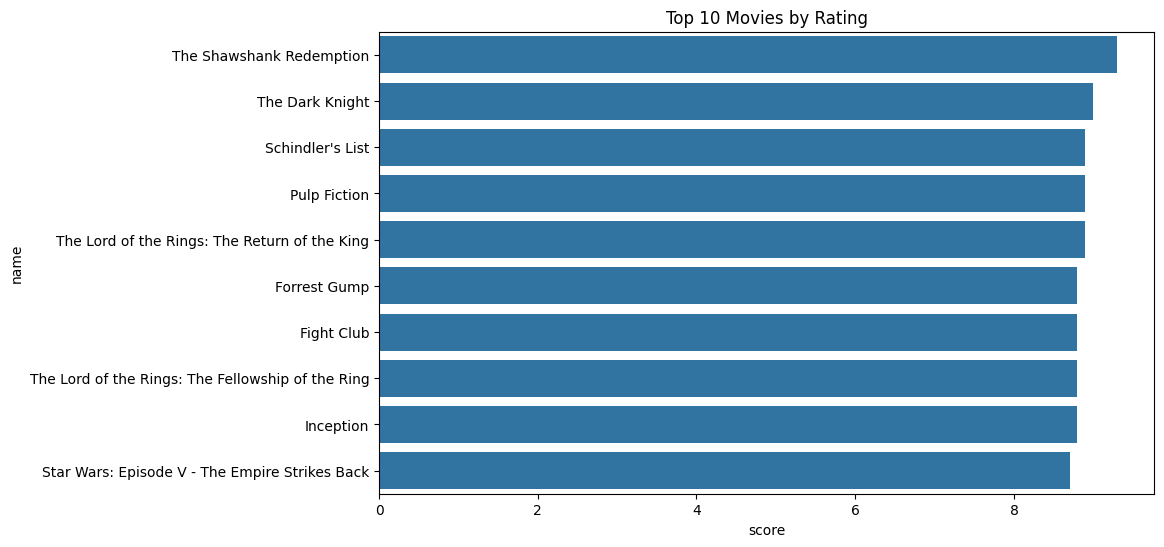

In [47]:
# Bar chart for top-rated movies
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='name', data=top_rated)
plt.title("Top 10 Movies by Rating")

Text(0.5, 1.0, 'Genre Distrubution')

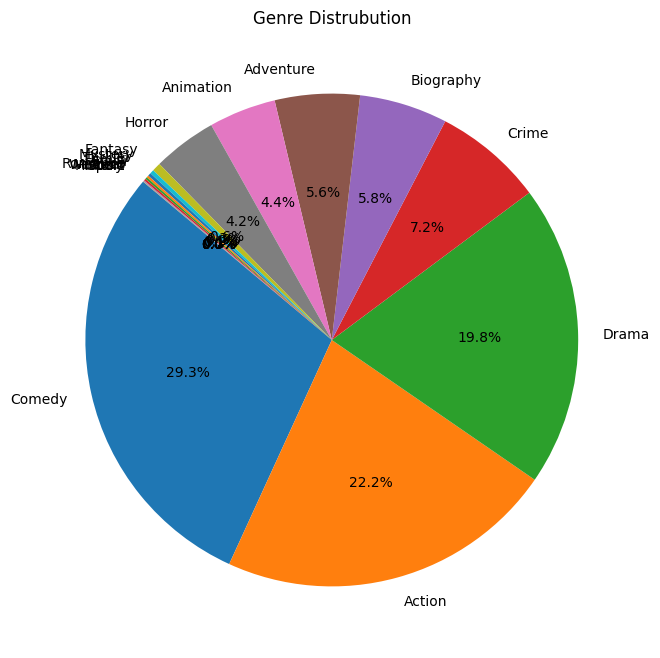

In [51]:
# Pie chart for genre distribution
genre_counts = df["genre"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Genre Distrubution")

Text(0.5, 1.0, 'Trend of Averge  Ratings/Score Over the Years')

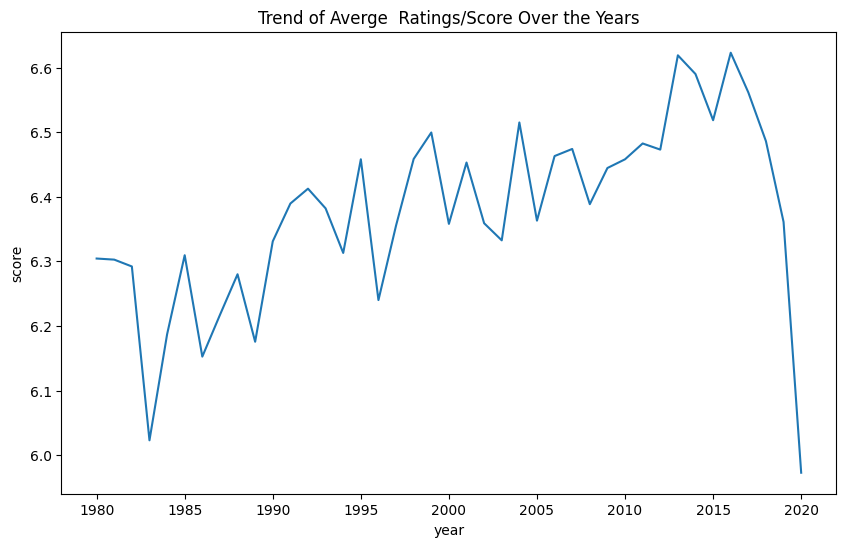

In [52]:
# Line plot for average ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_rating.index, y=average_rating)
plt.title("Trend of Averge  Ratings/Score Over the Years")


### Title: Export Cleaned Dataset

  - Save the cleaned and processed dataset for future use.

In [53]:
# Save cleaned dataset
df.to_csv("cleaned_movies.csv", index=False)